<a href="https://colab.research.google.com/github/aileeniesta/Computational-Physics/blob/main/ode/ode_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Euler's Method for Solving Ordinary Differential Equations (ODEs)

## Euler's Method for First-Order ODE's

We developed the ideas behind Euler's method in the lecuture slides. As an overview, suppose we want to solve the following first-order ODE:
$$ \frac{dy}{dt} = f(y), $$

where $f(y)$ is some function of our variable $y$.

The Euler update rule for $y$ is a result of replacing the derivative with its discrete approximation $\frac{\Delta y}{\Delta t} \approx f(y)$. The Euler update rule is given by
$$ y_{n+1} = y_n + f(y) \Delta t.$$

The update rule for time is simply:
$$ t_{n+1} = t_n +t \Delta t.$$



### 🔆 Example:  Exponential Growth

The equation for exponential growth or decay is given by
$$ \frac{dy}{dt} = ay,$$

where $a=$ the growth (or decay) rate. This formula is of the form of our first-order ODE above wehre $f(y) = ay$. This equation can be easily integrated with solution
$$y(t) = y_0 e^{at}.$$

If $a>0$ the quantity $y$ blows up exponentially and if $a<0$ it decays to zero.

Here's some Python code to implement the Euler rule:



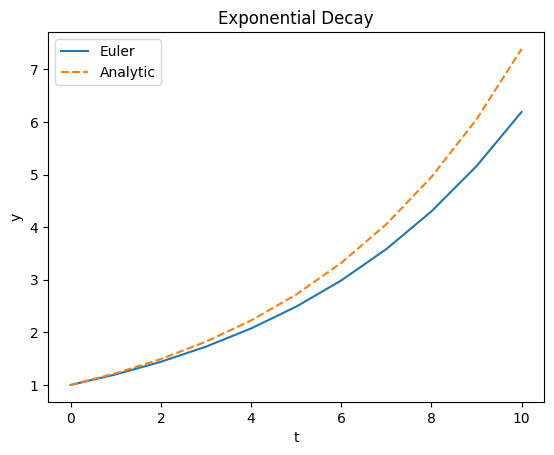

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#########  Parameters  #########

a    = 0.2            # decay constant
tmax = 10             # maximum time
dt   = 1              # time step
y0   = 1              # initial value of y


#########  Create Arrays  #########

N = int(tmax/dt)+1    # number of steps in simulation

y = np.zeros(N)       # array to store y values
t = np.zeros(N)       # array to store times

y[0] = y0             # assign initial value


#########  Loop to implement the Euler update rule  #########

for n in range(N-1):
    y[n+1] = y[n] + a*y[n]*dt
    t[n+1] = t[n] + dt


#########  Analytic Solution  #########

y_true = y0 * np.exp(a*t)


#########  Plot Solution  #########

plt.plot(t, y, label='Euler')
plt.plot(t, y_true, '--', label='Analytic')

plt.xlabel('t')                  # label the x and y axes
plt.ylabel('y')
plt.title("Exponential Decay")   # give the plot a title
plt.legend()                     # display the legend
plt.show()                       # display the plot

### ✅ Skill Check 1

Plot the percent error produced by Euler's method using the formula
$$percent\; error=\frac{|y-y_{analytic}|}{y_{analytic}}\times 100\%$$

Label your axes and give the plot a title

Text(0.5, 1.0, 'Euler Method Percent Error')

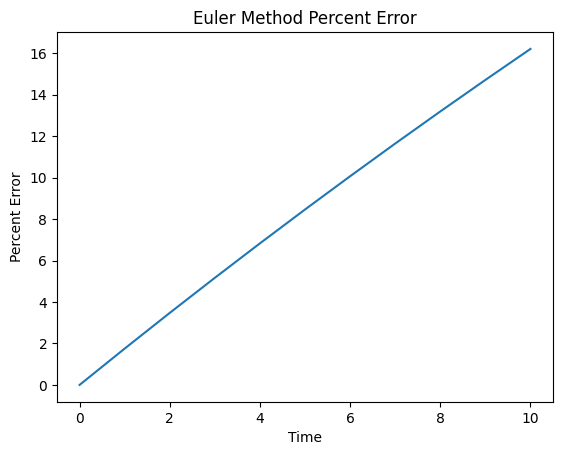

In [11]:
# your code here
percent_error = np.abs(y-y_true)/y_true * 100
plt.plot(t,percent_error)
plt.xlabel('Time')
plt.ylabel('Percent Error')
plt.title('Euler Method Percent Error')

### ✅ Skill Check 2

Imagine numerically integrating an exponential decay problem where the growth rate $a<0$.
* Without running any code, describe what you think the time-dependent solution will look like
* Do you think the relative error will increase or decrease with time? Why?
* Copy your code below and run it for $a=-0.2$.
* Describe your results

***** your answers here *****

*   the time dependent solution would be an exponential decay graph not an exponential growth
*   we don't think it will change



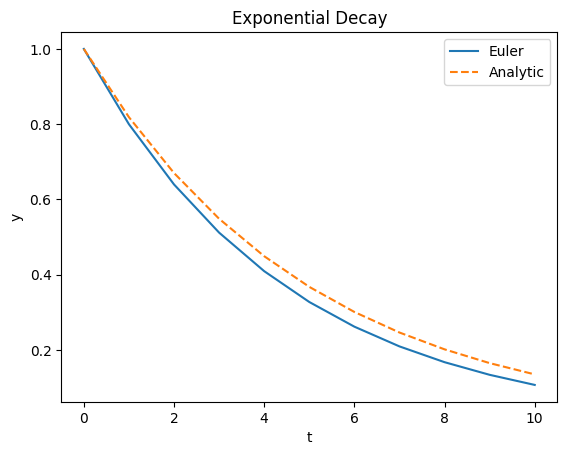

In [22]:
# your code here
import numpy as np
import matplotlib.pyplot as plt

#########  Parameters  #########

a    = -0.2            # decay constant
tmax = 10             # maximum time
dt   = 1              # time step
y0   = 1              # initial value of y


#########  Create Arrays  #########

N = int(tmax/dt)+1    # number of steps in simulation

y = np.zeros(N)       # array to store y values
t = np.zeros(N)       # array to store times

y[0] = y0             # assign initial value


#########  Loop to implement the Euler update rule  #########

for n in range(N-1):
    y[n+1] = y[n] + a*y[n]*dt
    t[n+1] = t[n] + dt


#########  Analytic Solution  #########

y_true = y0 * np.exp(a*t)


#########  Plot Solution  #########

plt.plot(t, y, label='Euler')
plt.plot(t, y_true, '--', label='Analytic')

plt.xlabel('t')                  # label the x and y axes
plt.ylabel('y')
plt.title("Exponential Decay")   # give the plot a title
plt.legend()                     # display the legend
plt.show()                       # display the plot

Text(0.5, 1.0, 'Euler Method Percent Error')

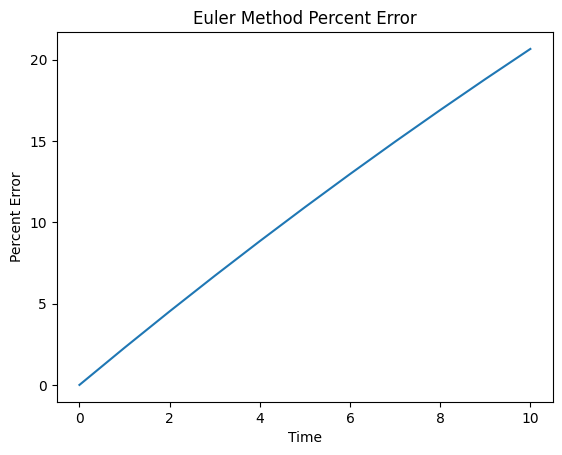

In [23]:
percent_error = np.abs(y-y_true)/y_true * 100
plt.plot(t,percent_error)
plt.xlabel('Time')
plt.ylabel('Percent Error')
plt.title('Euler Method Percent Error')

### ✅ Skill Check 3

* Convert the numerical integration code above into a fuction that returns the percent error on the **final time step** of the integration. Your function should take one parameter:  the time step dt. All other parameters should be defined inside the function.
* Create a loop that calls your function for the following time steps:          $1, 10^{-1}, 10^{-2}, 10^{-3}, 10^{-4}, 10^{-5}, 10^{-6}$. All other parameters should be the same as those in the code for the first example. If you want to be super fancy you can use the NumPy command `logspace()` to produce the desired values (Google or chatGPT the command for details).
* Create a log-log plot showing  log(error) vs. log(dt)
* Label your graph appropriately
* If your code gets hung up and takes too long to run, you can try omitting the smallest time step.
* Describe the error plot. Is this what you would expet for a first-order integration scheme?

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# your code here
def funny_percent_error(dt):


  #########  Parameters  #########

  a    = -0.2            # decay constant
  tmax = 10             # maximum time
  dt   = 1              # time step
  y0   = 1              # initial value of y

  #########  Create Arrays  #########
  N = int(tmax/dt)+1    # number of steps in simulation

  y = np.zeros(N)       # array to store y values
  t = np.zeros(N)       # array to store times

  y[0] = y0             # assign initial value

  #########  Loop to implement the Euler update rule  #########
  for n in range(N-1):
      y[n+1] = y[n] + a*y[n]*dt
      t[n+1] = t[n] + dt

  y_true = y0 * np.exp(a*t)

  percent_error = np.abs(y-y_true)/y_true * 100

  return int(percent_error[-1])


In [46]:
# dts = np.array[1, 10^-1 , 10^-2, 10^-3, 10^-4, 10^-5, 10^-6]

dts = np.logspace(0,-6,7)

for n in dts:
  funny_percent_error()



#for n in len(percent_error):



## Euler's Method for Second-Order ODE's

Second-order ODE's arise naturally from Newton's second law since acceleration is a second order:
$$F=ma$$.

Solve for acceleration
$$a=\frac{F}{m}.$$

Write as a position derivative and explicitly show the possible position, velocity and time dependence of the force:
$$\frac{d^2x}{dt^2}=\frac{a}{m}$$
where the acceleration is potentially a function of position, velocity, time and mass:  $a=F(x, v, t)/m$.

As discussed in the lecture slides, we write this second-order equation as two first-order equations like this:
$$ \frac{dx}{dt} = v $$

$$ \frac{dv}{dt} = \frac{a}{m}. $$

We can now apply the Euler method to each of these first-order ODEs:
$$ x_{n+1} = x_n + v_n \Delta t,$$

$$ v_{n+1} = v_n + a(x_n, v_n, t)\Delta t,$$

The update rule for time:
$$ t_{n+1} = t_n +t \Delta t.$$




### ✅ Skill Check 4

The equation of motion for a simple harmonic oscillator is
$$\frac{d^2x}{dt^2} =-\omega_0^2 x$$

where $\omega_0^2=k/m$ is the angular frequency of the oscillations.


* Use Euler's method to numerically integrate this equation of motion to solve for $x(t)$.
* You'll need to create arrays for both `x` and `v` and give them inital values. To keep things simple, assume `v_0=0`.
* Pick parameters so that your simulation generates at least 8-10 oscillations.
* Choose a time step between `dt=0.1` and `0.01`
* Create two subplots: the top subplot should show $x(t)$ and the bottom subplot should show the absolute error $x(t)-x_{theory}(x)$ where the theoretical solution is
$$ x_{theory}(t) = x_0 \cos(\omega_0 t)$$ assuming $v_0=0$. Note:  we plot the absolute error instead of the relative error because this solution passes through zero and will cause the relative error to "blow up."
* Create a legend on both plots labeling the curves
* Label the axes and give the plot a title
* Experiment with the time step. Can you pick a time step where the absolute error no longer increases with time? What implications does this have on the stability and usefullness of Euler's method for this system?

In [30]:
# your code here
import numpy as np
import matplotlib.pyplot as plt

#########  Parameters  #########
tmax = 1             # maximum time
dt   = 0.06              # time step
v_0 = 0
x_0 = 0
k = 8
m = 1
#########  Create Arrays  #########

N = int(tmax/dt)+1    # number of steps in simulation

x = np.zeros(N)       # array to store y values
v = np.zeros(N)       # array to store times

#########  Loop to implement the Euler update rule  #########

for n in range(N-1):
    x[n+1] = np.sqrt(-k*x[n])*dt
    t[n+1] = t[n] + dt


#########  Analytic Solution  #########

y_true = y0 * np.exp(a*t)


#########  Plot Solution  #########

plt.plot(t, y, label='Euler')
plt.plot(t, y_true, '--', label='Analytic')

plt.xlabel('t')                  # label the x and y axes
plt.ylabel('y')
plt.title("Exponential Decay")   # give the plot a title
plt.legend()                     # display the legend
plt.show()                       # display the plot

IndexError: index 11 is out of bounds for axis 0 with size 11

## Euler-Cromer-Aspel Method

If we modify our Euler method in one shockingly simple way, we go from a first-order Euler method that is inherently unstable for the simple harmonic oscillator and other oscillatory, energy-conserving systems, to one that is stable with much smaller errors.

The simple trick is this: use the new velocity `v[n+1]` in the position update rule instead of the old velocity `v[n]`. With this one simple change, we get a much more robust integration method for oscillatory, energy-conserving systems.

The Euler-Cromer rule looks like this for the simple harmonic oscillaror:
```
for n in range(N-1):
    v[n+1] = v[n] - k/m*x[n]*dt    
    x[n+1] = x[n] + v[n+1]*dt      # modified to use v[n+1] instead of v[n]
    t[n+1] = t[n] + dt
```

Historical Note:  While this method is commonly called the Euler-Cromer or the Symplectic Euler method, we believe the addition of "Aspel" is warranted. Alan Cromer attributes the discovery of this method to a high school stutent, Abby Aspel. Richard Feynman notes that the method has been discovered, forgotten and rediscovered many times since Newton. It was Cromer's paper analyzing Aspel's re-discovery of the method, however, that came at a time (1980) when numerical computations were more widespread in physics. Cromer received recognition while the (female) discoverer did not.

### ✅ Skill Check 5

In this problem, we will modify our Euler method to use the Euler-Cromer-Aspel method: replace the `v[n]` term in the position update rule with `v[n+1]`. This will require movint the `x` update rule after the `v` update. The for loop with the update rules will look something like this:
```
for n in range(N-1):
    v[n+1] = v[n] - k/m*x[n]*dt    
    x[n+1] = x[n] + v[n+1]*dt      # modified to use v[n+1] instead of v[n]

    t[n+1] = t[n] + dt
```

* Copy your simple harmonic oscillator code to the cell below and make the modifications described above.
* Run your code.
* Compare the error with the "normal" Euler method. Your error should be much, much smaller and not grow over time.


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# your code here